          x      f(x)     f'(x)    f''(x)
0  2.500000  0.571944 -2.102287 -1.396944
1  0.995082  1.578588 -2.102287 -1.396944
2  1.469011  1.773849  0.889853 -1.877607
3  1.427642  1.775726 -0.090582 -2.189649


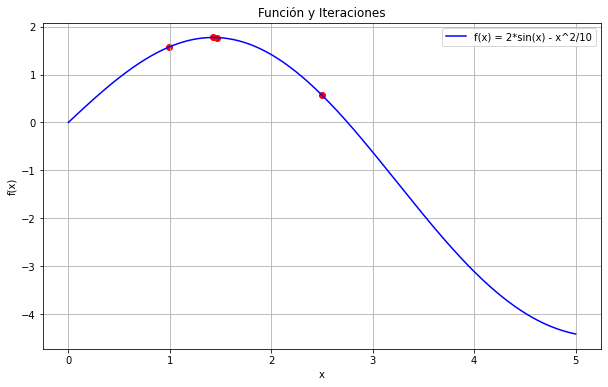

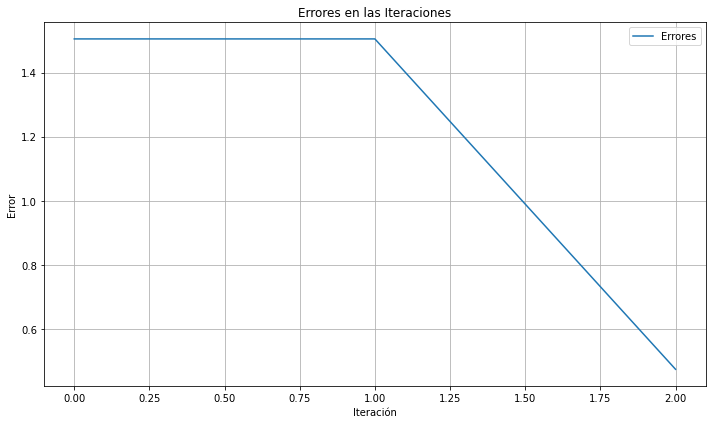

Máximos locales: [2.5, 0.995081551325993, 1.4690107527596457, 1.4276423210187772]
Mínimos locales: []


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return 2*np.sin(x) - x**2/10

def f_prime(x):
    return 2*np.cos(x) - x/5

def f_double_prime(x):
    return -2*np.sin(x) - 1/5

# Valores iniciales
x0 = 2.5
tolerancia = 0.01

x_values = [x0]
f_values = [f(x0)]
f_prime_values = [f_prime(x0)]
f_double_prime_values = [f_double_prime(x0)]


while True:
    x = x_values[-1]
    x1 = f_prime(x)
    x2 = f_double_prime(x)
    
    if abs(x2) < 1e-10:
        break
    
    x_next = x - x1/x2
    
    error = abs(x_next - x)
    
    if error < tolerancia:
        break
    
    x_values.append(x_next)
    f_values.append(f(x_next))
    f_prime_values.append(x1)
    f_double_prime_values.append(x2)

data = {'x': x_values, 'f(x)': f_values, "f'(x)": f_prime_values, "f''(x)": f_double_prime_values}
tabla_resultados = pd.DataFrame(data)

print(tabla_resultados)

# Grafica de la función
x_range = np.linspace(0, 5, 400)
y_range = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_range, label='f(x) = 2*sin(x) - x^2/10', color='blue')
plt.scatter(x_values, f_values, color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y Iteraciones')
plt.legend()
plt.grid(True)

# Grafica del error
errores = np.abs(np.array(f_prime_values[:-1]) / np.array(f_double_prime_values[:-1]))
plt.figure(figsize=(10, 6))
plt.plot(errores, label='Errores')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.title('Errores en las Iteraciones')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Encontrar máximos y mínimos
maximos = tabla_resultados[tabla_resultados["f''(x)"] < 0]["x"]
minimos = tabla_resultados[tabla_resultados["f''(x)"] > 0]["x"]

print(f"Máximos locales: {maximos.tolist()}")
print(f"Mínimos locales: {minimos.tolist()}")